In [1]:
"""
@author: anahí
pip install seaborn
https://scikit-learn.org/stable/modules/tree.html#
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')


In [2]:
#%%  CARGAMOS DATASET Y LO CONOCEMOS UN POCO
titanic = sns.load_dataset("titanic")

print(titanic.shape)
print(titanic.columns)
titanic.head()


(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(f'Hay datos ausentes? {titanic.isnull().any().any()}')
titanic.info()

Hay datos ausentes? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived
0    549
1    342
dtype: int64


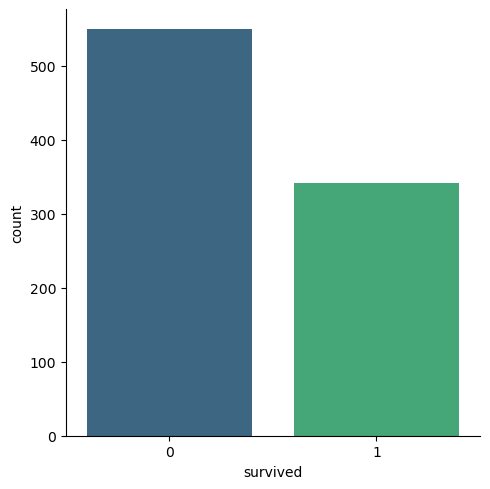

In [5]:
print(titanic.groupby('survived').size())
sns.catplot(x='survived', data = titanic, kind = "count", palette='viridis')
# 1.5 no, 1 si - » hay desbalance

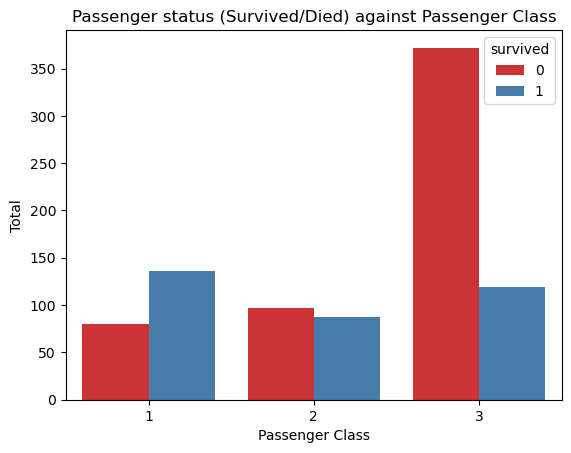

In [6]:
# https://www.kaggle.com/code/thulani96/titanic-dataset-analysis-with-seaborn

ax = sns.countplot(x = 'pclass', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


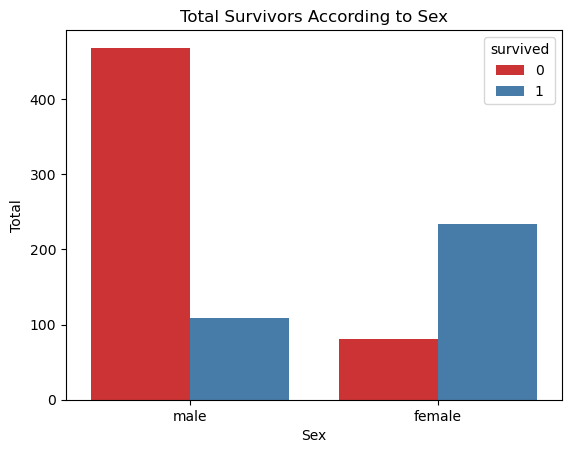

In [7]:
print(pd.crosstab(titanic["sex"],titanic.survived))
ax = sns.countplot(x = 'sex', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

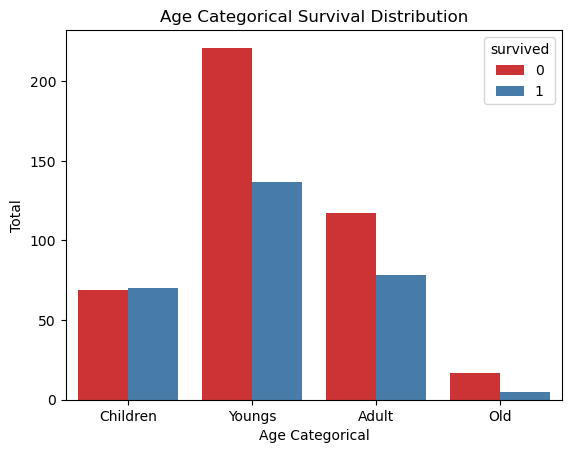

In [8]:
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Youngs','Adult', 'Old']
titanic['age_cats'] = pd.cut(titanic.age, interval, labels = categories)

ax = sns.countplot(x = 'age_cats',  data = titanic, hue = 'survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()


survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217


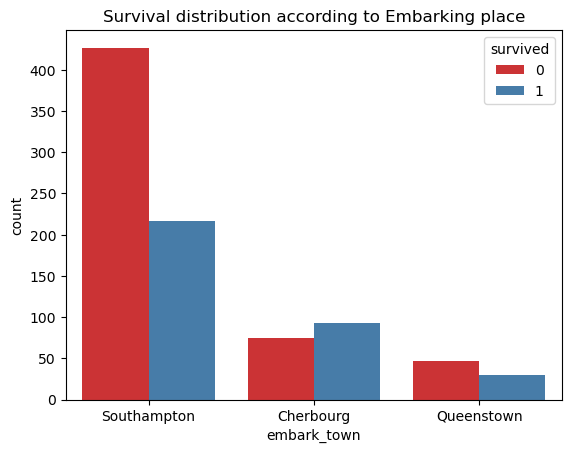

In [9]:
print(pd.crosstab(titanic['embarked'], titanic.survived))
ax = sns.countplot(x = 'embark_town', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [ ]:
#%%  PREPARAMOS LOS DATOS PARA EL MODELO
# asignamos el valor medio a los faltantes de la columna 'age'
titanic['age'] = titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))
# Rellena los valores nulos de la columna 'age' usando el promedio de edad calculado por cada
# combinación de clase (pclass) y sexo (sex). Así se obtiene una imputación más precisa que usar el promedio global.

titanic.info()

# quedaron casi todas las columnas sin NaN, excepto 'deck' que sólo tiene 203 valores no nulos
# esa columna la eliminaremos pues no tiene suficientes datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cats     714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [11]:
# definimos la variable a predecir
y = titanic.pop("survived")

# elegimos las características predictoras
features = ["sex", "class", 'age', 'embark_town', 'adult_male', 'fare', 'sibsp', 'parch', 'alone']    # columnas para usar
X_not = titanic[features]
X_not.head()


,sex,class,age,embark_town,adult_male,fare,sibsp,parch,alone
0,male,Third,22.0,Southampton,True,7.2500,1,0,False
1,female,First,38.0,Cherbourg,False,71.2833,1,0,False
2,female,Third,26.0,Southampton,False,7.9250,0,0,True
3,female,First,35.0,Southampton,False,53.1000,1,0,False
4,male,Third,35.0,Southampton,True,8.0500,0,0,True


In [12]:
X_not.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   class        891 non-null    category
 2   age          891 non-null    float64 
 3   embark_town  889 non-null    object  
 4   adult_male   891 non-null    bool    
 5   fare         891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(2)
memory usage: 44.6+ KB


In [13]:
# aplicamos el método de Pandas equivalente a OneHotEncoder sobre pclass,
# recordar que sólo opera sobre columnas con type= 'object' o 'category'
# pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False,
#                    columns=None, sparse=False, drop_first=False, dtype=None)
X=pd.get_dummies(X_not, prefix_sep='-', dummy_na=False, columns=['sex', 'class', 'embark_town'], drop_first=True)

X

,age,adult_male,fare,sibsp,parch,alone,sex-male,class-Second,class-Third,embark_town-Queenstown,embark_town-Southampton
0,22.00,True,7.2500,1,0,False,True,False,True,False,True
1,38.00,False,71.2833,1,0,False,False,False,False,False,False
2,26.00,False,7.9250,0,0,True,False,False,True,False,True
3,35.00,False,53.1000,1,0,False,False,False,False,False,True
4,35.00,True,8.0500,0,0,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,27.00,True,13.0000,0,0,True,True,True,False,False,True
887,19.00,False,30.0000,0,0,True,False,False,False,False,True
888,21.75,False,23.4500,1,2,False,False,False,True,False,True
889,26.00,True,30.0000,0,0,True,True,False,False,False,False


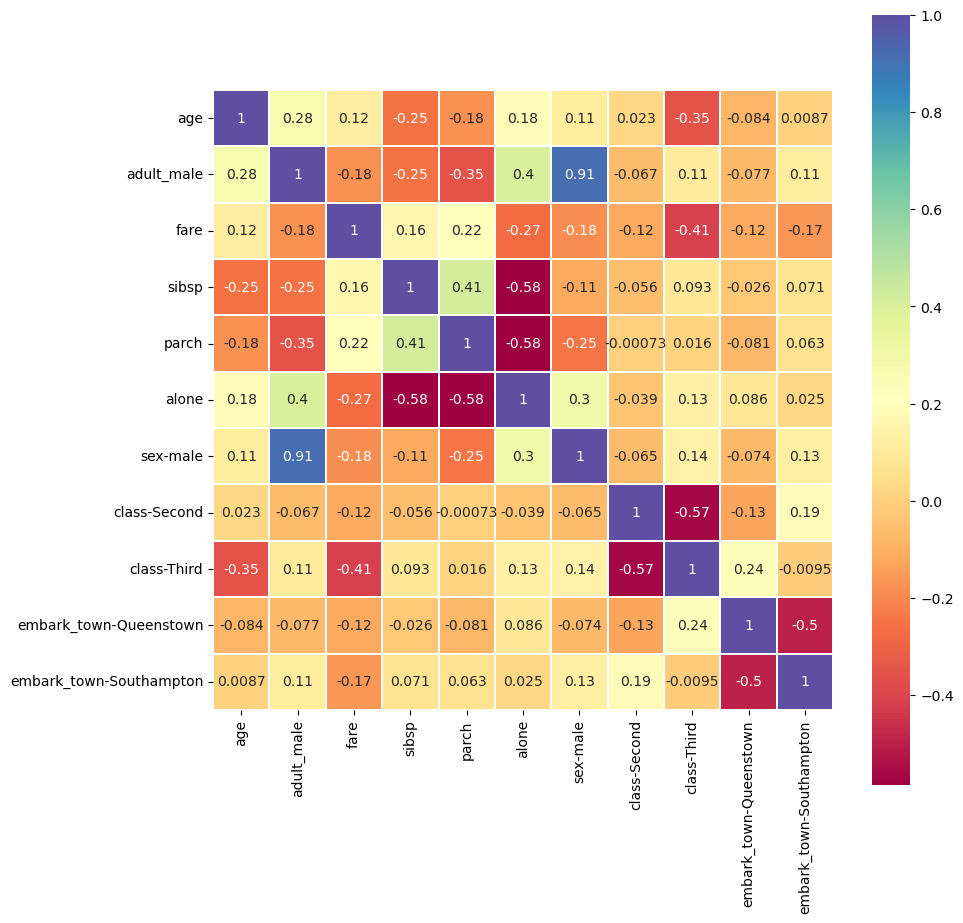

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),linewidths=0.1, square=True,  linecolor='white', annot=True, cmap='Spectral')
plt.show()
plt.close()

Se usa DecisionTreeClassifier porque es un modelo de clasificación supervisada que permite aprender reglas de decisión a partir de los datos. Es fácil de interpretar, muestra cómo se toman las decisiones y sirve como base para comparar con modelos más complejos como Random Forest. Además, ayuda a identificar el sobreajuste y la importancia de las variables predictoras en el problema.

In [ ]:
# SEPARAMOS DATASET EN CJTO ENTRENAMIENTO Y TEST 75/25,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

criterio='entropy'
# criterio='gini'
arbol=DecisionTreeClassifier(criterion=criterio, random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

Se utiliza RandomForestClassifier para comparar el rendimiento con el árbol de decisión. El Random Forest es un modelo más robusto porque combina muchos árboles y reduce el sobreajuste, logrando generalmente mejor capacidad de generalización. Además, se usa el mismo criterio de división (entropy) para que la comparación sea justa. Así puedes ver cómo mejora el desempeño al pasar de un solo árbol a un conjunto de árboles (bosque aleatorio).

In [16]:
# instanciamos un bosque aleatorio con el mismo criterio que el árbol anterior para comparar
bosque=RandomForestClassifier(random_state=16, criterion=criterio, oob_score=True)
bosque.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=16)

[0.2271408  0.26157938 0.31017277 0.01951285 0.01631188 0.01376213
 0.01224088 0.01465624 0.10900046 0.00629504 0.00932757]


<Axes: ylabel='None'>

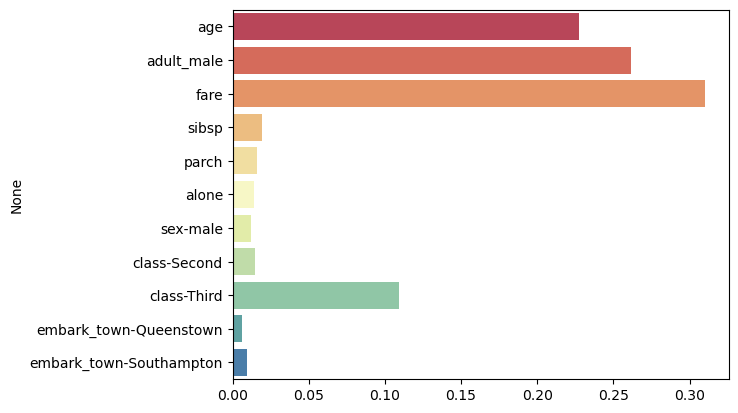

In [17]:
#%%    VEMOS QUÉ VARIABLES PESARON MÁS EN LAS DECISIONES DEL ÁRBOL
fi=arbol.feature_importances_
print(fi)
sns.barplot(y = X_train.columns, x = fi, palette='Spectral')

[0.26729161 0.13173066 0.27139952 0.04045657 0.03107815 0.01624842
 0.11844444 0.02286088 0.06211791 0.01303074 0.0253411 ]


<Axes: ylabel='None'>

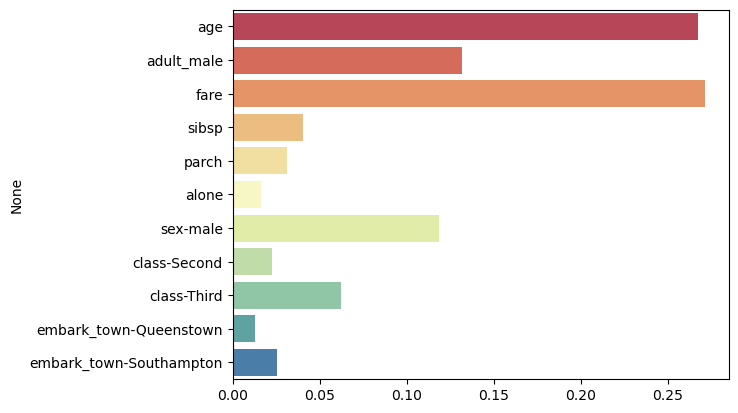

In [18]:
# idem para el bosque...
fiB=bosque.feature_importances_
print(fiB)
sns.barplot(y = X_train.columns, x = fiB, palette='Spectral')

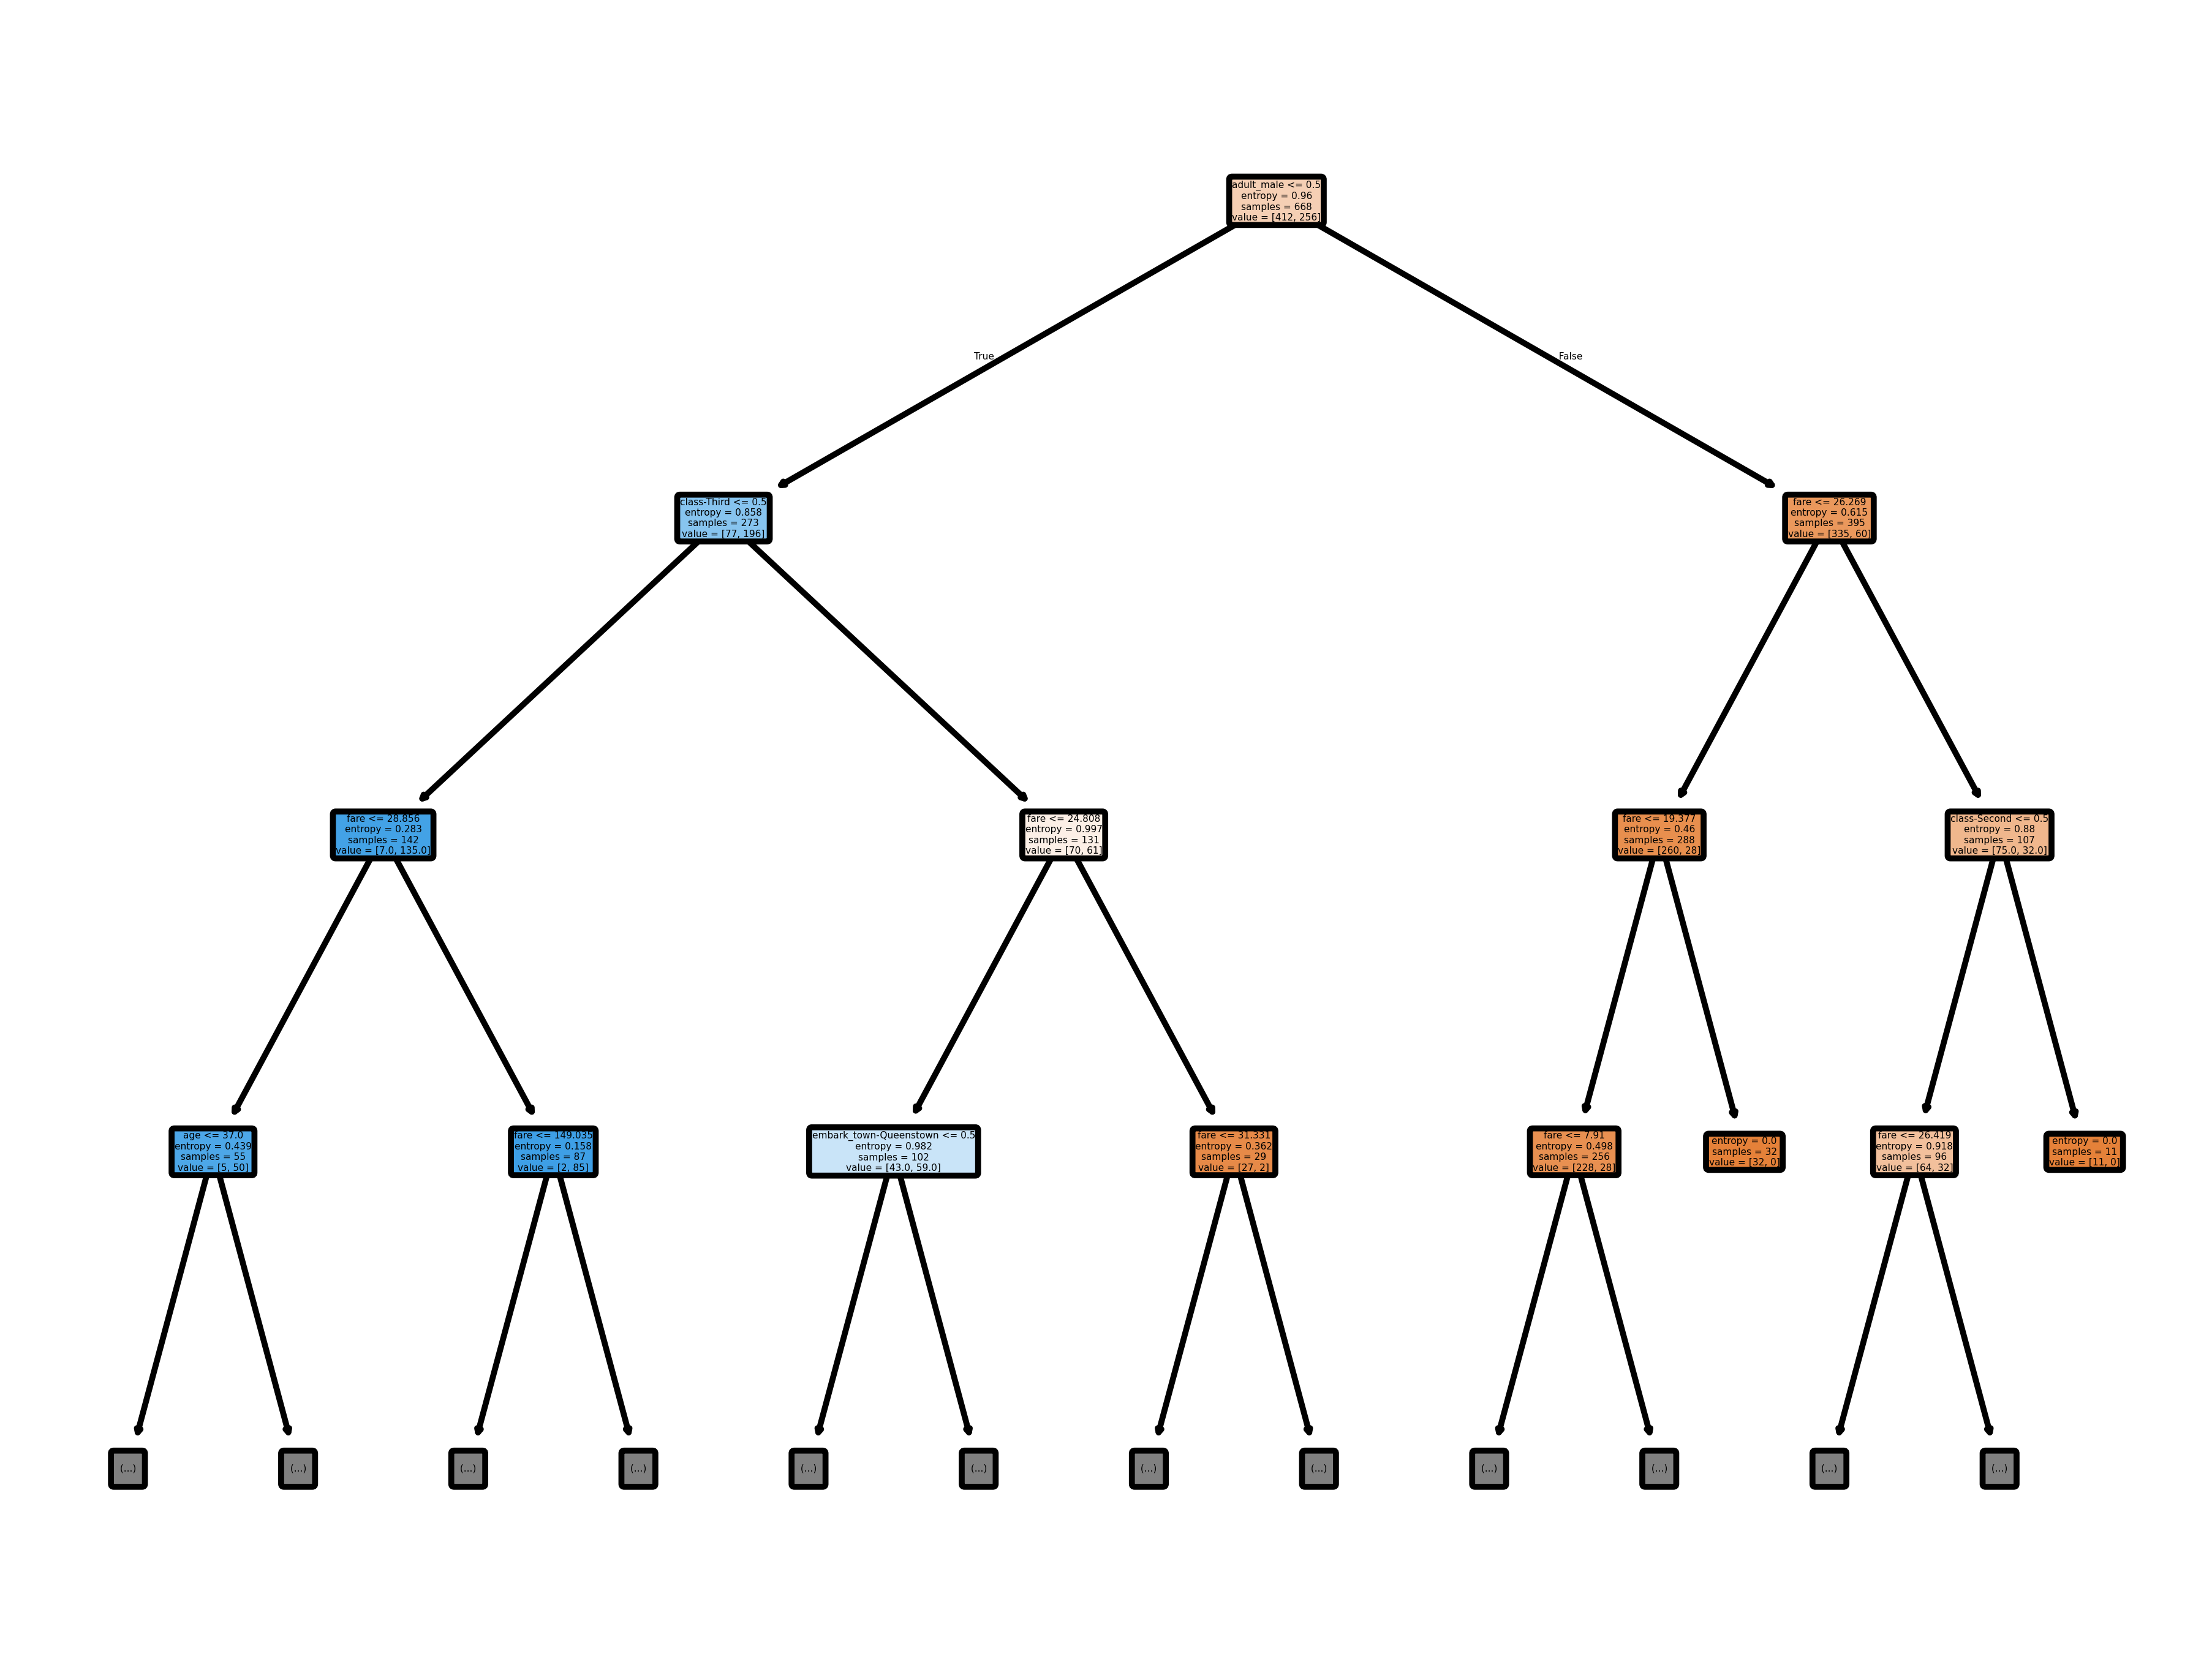

In [19]:
#%%   GRÁFICO DEL ÁRBOL
# plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None,
# label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False,
# precision=3, ax=None, fontsize=None)

list_features=list(X.columns)
plt.figure(dpi=700)
plot_tree(arbol, max_depth=3, filled=True, rounded=True, feature_names=list_features)
plt.show()
plt.close()

In [20]:
#%%    HACEMOS PREDICCIONES Y VEMOS SCORE
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))

# Se ve claramente que el árbol está sobrejustando

Score train:  0.9925149700598802
Score test:   0.7937219730941704


In [21]:
#%%    HACEMOS PREDICCIONES Y VEMOS SCORE para el bosque
y_predB = bosque.predict(X_test)
print('Score train: ', bosque.score(X_train, y_train))
print('Score test:  ', bosque.score(X_test, y_test))
print('OOB Score: ', bosque.oob_score_)


Score train:  0.9925149700598802
Score test:   0.7982062780269058
OOB Score:  0.7964071856287425


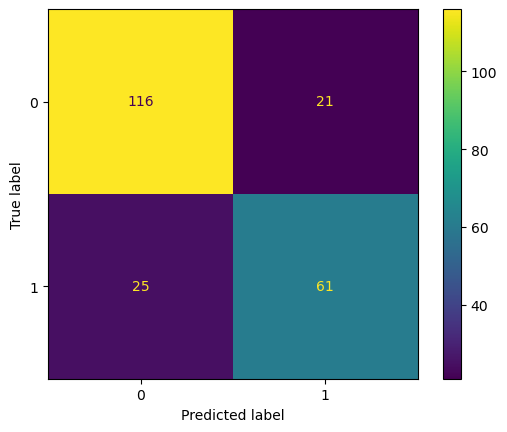

In [22]:
#%%    MATRIZ DE CONFUSION PARA VER MEJOR EL RENDIMIENTO DEL MODELO
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

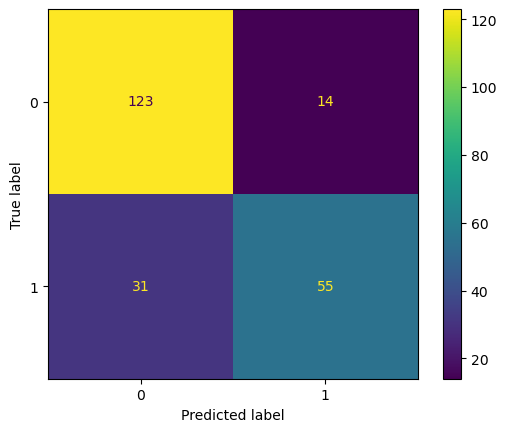

In [23]:
#%%    MATRIZ DE CONFUSION PARA VER MEJOR EL RENDIMIENTO DEL MODELO
cmB = confusion_matrix(y_test, y_predB)
ConfusionMatrixDisplay(cmB).plot()

In [24]:
#  Y LEO DI CAPRIO? QUÉ DICE EL MODELO QUE LE DEBIÓ SUCEDER?
'''
features = ['sex', 'age', 'sibsp', 'parch','fare', 'adult_male', 'alone', 'class-First',
 'class-Second', 'class-Third', 'embark_town-Cherbourg', 'embark_town-Queenstown',
 'embark_town-Southampton']
 '''
leo = {'age': [23], 'adult_male': [1],'fare':[7.],'sibsp':[0], 'parch':[0], 'alone':[0],'sex-male': [1], 'class-Second':[0], 'class-Third': [1],
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1]}
leo1 = pd.DataFrame.from_dict(leo)
print('Leo sobrevivió, Árbol? ', arbol.predict(leo1))
print('Leo sobrevivió, Bosque? ', bosque.predict(leo1))
# Y Rose? qué fue de ella?
ros = {'age': [23], 'adult_male': [0],'fare':[70.],'sibsp':[0], 'parch':[1], 'alone':[0],'sex-male': [0], 'class-Second':[0], 'class-Third': [0],
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1]}
rose = pd.DataFrame.from_dict(ros)
print(f'Rose sobrevivió, Árbol? {arbol.predict(rose)}')
print(f'Rose sobrevivió, Bosque? {bosque.predict(rose)}')
# Interesante, verdad?

Leo sobrevivió, Árbol?  [0]
Leo sobrevivió, Bosque?  [0]
Rose sobrevivió, Árbol? [1]
Rose sobrevivió, Bosque? [1]


En este fragmento se está realizando una búsqueda del mejor valor de ccp_alpha para el clasificador Random Forest usando el método Out-Of-Bag (OOB) como métrica de validación.

¿Qué se hace paso a paso?

Se crea un rango de valores para ccp_alpha (alfa=np.arange(0, 0.5, 0.0005)), que es el parámetro de poda de coste-complejidad.
Se inicializan listas para guardar los resultados de score OOB y de entrenamiento.
Se entrena un RandomForestClassifier para cada valor de alpha, guardando el score OOB y el score de entrenamiento.
Al finalizar, se busca el valor de alpha que maximiza el score OOB (maxalfa=max(oob)), se imprime ese valor y el correspondiente valor de alpha (alfa[indmax]).
¿Para qué sirve?

Esto permite encontrar el nivel óptimo de poda para el bosque aleatorio, evitando el sobreajuste y mejorando la capacidad de generalización del modelo. El score OOB es una estimación del rendimiento del modelo usando las muestras no incluidas en cada árbol, lo que lo hace útil para validar sin necesidad de un conjunto de test adicional.

In [ ]:
# USO DE CCP ALPHA
alfa=np.arange(0, 0.5, 0.0005)  # Creamos un rango de valores para ccp_alpha, de 0 a 0.5 en pasos de 0.0005
oob=[]                          # Lista para guardar los scores OOB de cada modelo
train=[]                        # Lista para guardar los scores de entrenamiento de cada modelo

for al in alfa:                 # Iteramos sobre cada valor de alpha
  bosque2=RandomForestClassifier(random_state=16, criterion=criterio, oob_score=True, ccp_alpha=al)  # Instanciamos un RandomForest con el alpha actual
  bosque2.fit(X_train, y_train) # Entrenamos el modelo con los datos de entrenamiento
  y_predB = bosque2.predict(X_test) # Realizamos predicciones (no se usa en este fragmento)
  oob.append(bosque2.oob_score_)    # Guardamos el score OOB del modelo
  train.append(bosque2.score(X_train, y_train)) # Guardamos el score de entrenamiento

maxalfa=max(oob)               # Buscamos el score OOB máximo obtenido
print(maxalfa)                 # Imprimimos el valor máximo de score OOB
indmax=oob.index(maxalfa)      # Obtenemos el índice donde se alcanzó el máximo score OOB
print(alfa[indmax])            # Imprimimos el valor de alpha correspondiente al mejor score OOB

0.8233532934131736
0.0085


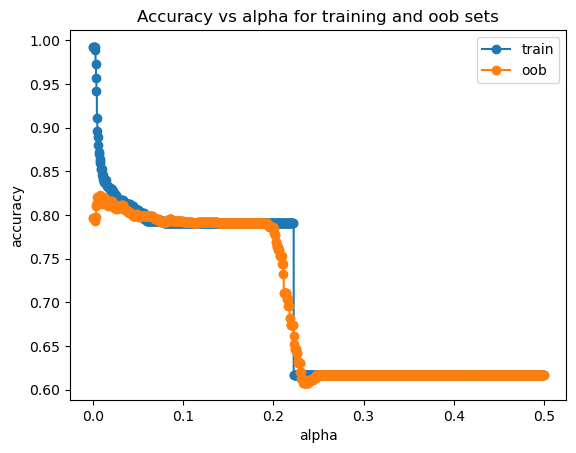

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and oob sets")
ax.plot(alfa, train, marker="o", label="train", drawstyle="steps-post")
ax.plot(alfa, oob, marker="o", label="oob", drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
print(len(alfa))
len(oob)

1000


1000

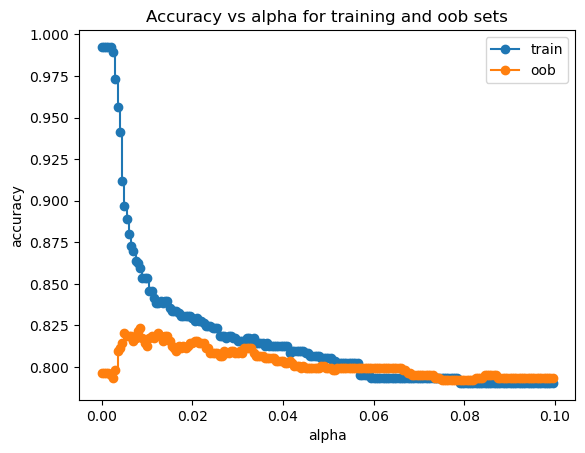

In [28]:
# mirar mejor entre 0 y 0.1
alfita=alfa[:200]
oobito=oob[:200]
trainito=train[:200]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and oob sets")
ax.plot(alfita, trainito, marker="o", label="train", drawstyle="steps-post")
ax.plot(alfita, oobito, marker="o", label="oob", drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
maxalfa=max(oob)
print(maxalfa)
indmax=oob.index(maxalfa)
print(alfa[indmax])
print(indmax)

0.8233532934131736
0.0085
17


In [39]:
print(indmax)
print(alfa[indmax])
best=RandomForestClassifier(random_state=16, criterion=criterio, oob_score=True, ccp_alpha=alfa[indmax])
best.fit(X_train, y_train)
y_best = best.predict(X_test)
print('Score train: ', best.score(X_train, y_train))
print('Score test:  ', best.score(X_test, y_test))
print('OOB Score: ', best.oob_score_)

17
0.0085
Score train:  0.8592814371257484
Score test:   0.8251121076233184
OOB Score:  0.8233532934131736
